# <span style="color:maroon">**NRP Monitor Software**</span>

###### <span style="color:green">**Import modules and define utility functions**</span>

In [5]:
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [2]:
# Utility Functions
def combine_dataframes(pattern, names, index_col, na_values, header=1, parse_dates=True, ignore_index=True):
    # creates a list of file pointers matching the pattern
    files = glob.glob(pattern)                        
    frames = []
   
    # iterate through each file pointer
    for f in files:
    
        # loads file into dataframe variable: df
        df = pd.read_csv(f, names=names, index_col=index_col, na_values=na_values,
                         header=header, parse_dates=parse_dates)                           
        
        # adds dataframe from df into list: frames
        frames.append(df)  
    
    # concatenate all dataframes in frames into a single dataframe
    return pd.concat(frames, ignore_index=ignore_index)    

def fillgaps(df,):
    s = []
    df.apply(lambda col: s.append(col.loc[col.first_valid_index():col.last_valid_index()].fillna(0)))
    return pd.DataFrame(s).transpose()

def df_eda(df):
    print(df.head(), "\n")
    print(df.tail(), "\n")
    print(df.shape, "\n")
    print(df.columns, "\n")
    print(df.info(), "\n")
    print(df.dtypes, "\n")
    print(df.describe())

###### <span style="color:green">**Load, clean, and shape data**</span>

In [3]:
# load daily manager data into a dataframe: mgr_data
col_names = ["date", "manager", "profit", "flow", "equity_sod", "roe"]
mgr_data = combine_dataframes("./data/manager_data.csv", names=col_names, index_col="date", na_values=" #N/A N/A ", ignore_index=False)

# pivot mgr_data into a tidy dataframes for all data columns
profits = fillgaps(pd.pivot_table(mgr_data, values="profit", index="date", columns="manager"))
flows = fillgaps(pd.pivot_table(mgr_data, values="flow", index="date", columns="manager"))
equity_sod = fillgaps(pd.pivot_table(mgr_data, values="equity_sod", index="date", columns="manager"))
roes = fillgaps(pd.pivot_table(mgr_data, values="roe", index="date", columns="manager"))

###### <span style="color:green">**Generate basic analytical dataframes**</span>

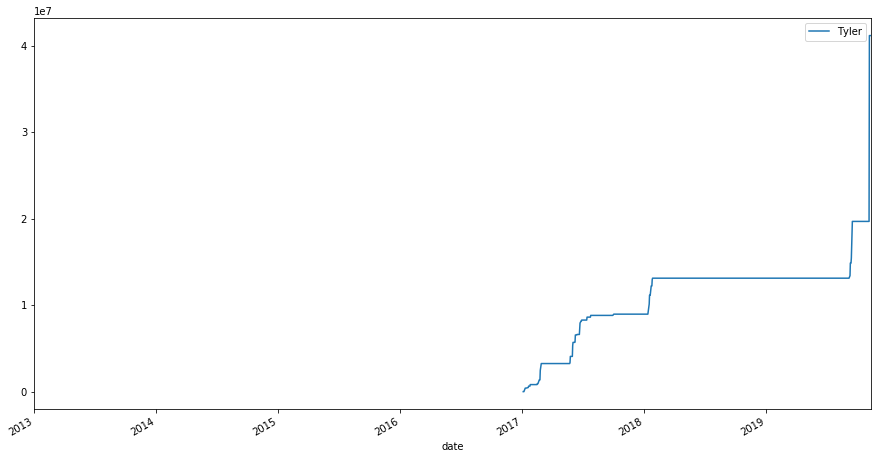

In [21]:
# cumulative profits
profits_rc = profits.cumsum()
profits_hwm = profits_rc.cummax()

profits_hwm[["Tyler"]].plot(figsize=(15,8))
plt.show()

###### <span style="color:green">**Exploratory data analysis**</span>

In [22]:
selected_df = profits
df_eda(selected_df)
selected_df.to_csv("deletesoon.csv")

            Anthony  Anuj         Bart  Bill        Chip      Dave E  \
date                                                                   
2013-01-01      NaN   NaN          NaN   NaN         NaN         NaN   
2013-01-02      NaN   NaN      1628.51   NaN  4163333.65  3441953.74   
2013-01-03      NaN   NaN -16929803.63   NaN   -75765.41 -2443353.06   
2013-01-04      NaN   NaN   4053566.99   NaN  2109927.98  2744626.48   
2013-01-07      NaN   NaN    513862.38   NaN -1550574.94 -1612212.07   

                    Ed  John  Kevin  Marc        Mike          PAR  \
date                                                                 
2013-01-01         NaN   NaN    NaN   NaN         NaN         0.00   
2013-01-02  2343918.45   NaN    NaN   NaN  2762256.96  29013715.61   
2013-01-03  1158426.35   NaN    NaN   NaN    91146.84  -7308219.82   
2013-01-04  8962800.87   NaN    NaN   NaN   766563.84  27189575.04   
2013-01-07  1707778.43   NaN    NaN   NaN -1011591.09   2572684.81   

    

In [ ]:
print(df.ticker.value_counts(dropna=False), "\n")
print(df["ticker"].value_counts(dropna=False), "\n")     # same as previous lines
print(df[df.volume > 1000000000], "\n")                  # basic filtering - version 1
print(df[df["volume"] > 1000000000])                     # basic filtering - version 2

In [ ]:
import matplotlib.pyplot as mpl
%matplotlib inline

# plot histogram of volume - note the use of logarithmic transforms of both the x and y axis
df.volume.plot(kind="hist", rot=70, logx=True, logy=True, figsize=(12, 6))

In [ ]:
# Boxplots are great when you have a numeric column that you want to compare across different categories.
df.boxplot(column="volume", by="ticker", rot=90, figsize=(12,6))

In [ ]:
# When you want to visualize two numeric columns, scatter plots are ideal.
# Notice the fan shapped pattern - why is that the case?
df[df["ticker"]=="MU"].plot(kind="scatter", x="close", y="cap", rot=90, figsize=(12,6))

###### <span style="color:green">**Miscellaneous and Supplementary**</span>

In [ ]:
# roes.profit = pd.to_numeric(roes.profit, errors="coerce")
# roes.flow = pd.to_numeric(roes.flow, errors="coerce")
# roes.equity_sod = pd.to_numeric(roes.equity_sod, errors="coerce")
# roes.roe = pd.to_numeric(roes.roe, errors="coerce")